## Setting up a hypothesis test

- Define hypothesis 
    - The null hypothesis is what you're trying to falsify (reject). The alternative hypothesis is what would be true if the null were rejected
    - e.g. In the case of classifying an email as spam or not spam, the hypotheses might be:
        - H0: The email is not spam
        - H1: The email is spam
    - Not rejecting the null != Accepting the null
        - Just because we don't reject the null does not mean the null is true, merely that we cannot be sure that it is false

- In hypothesis testing, there are 2 sources of errors. You can 
    - Wrongly rejecting the null hypothesis (i.e. H0 is true, but you reject it), also known as type 1 error
    - Wrongly not-rejecting the null hypothesis (i.e. H1 is true but you do not reject H0), also known as type 2 error
    
        | | Actual: H0 not True | Actual: H0 True |
        | --- | --- | --- |
        | Reject H0 | Correct | Type 1 Error |
        | Do not reject H0 | Type 2 Error | Correct |

- I have found that it is easier to visualise this through the following graph
    - 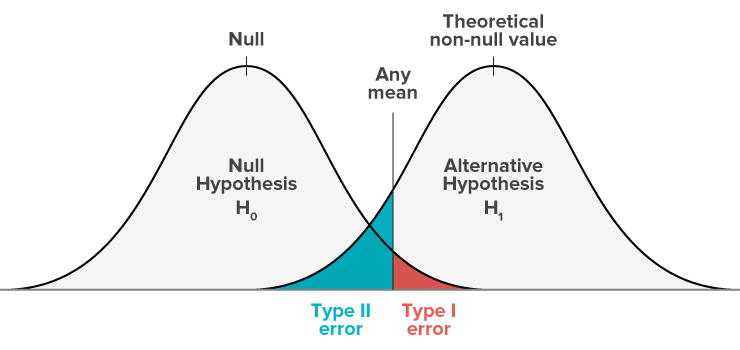
    - Let the x-axis be the variable of interest $X$
    - If H0 is true, then $X$ takes on some range of values, with PDF as shown with the LHS graph. If H1 is true, then $X$ is distributed according to RHS graph
    - Obviously, if X value is at the extreme left of the X axis, it is more likely that H0 is true than H1. If X is at the extreme right, then H1 is more likely to be true than H0.
    - However, any hypothesis will likely come with a degree of overlap in probabilities
        - Take for example the Spam-not spam classifier. Just because "lottery" is seen in an email, it doesn't give certainty that it is a spam email. Merely makes it more probable
    - As long as there is overlap between the distributions of H0 and H1, there is a non-zero chance of incurring errors (red + blue area)
    - Depending on the true cost of type 1 (red) or type 2 (blue) errors, I can choose how much of each error I am willing to tolerate
        - In the spam example, I may be willing to tolerate a big red segment (i.e. mistaking spam for not spam) vs a small blue segment, because it is much better for spam to enter the inbox than for a legitimate email to be deleted
        - To achieve this, all I have to do is to set the cutoff at a high enough value such that almost all our emails are classified as not spam, unless I am almost certain it is spam

        


- There are 3 main types of null hypothesis 
    - Right-tailed test: 
        - Alternative hypothesis is on the right of the null hypothesis, so right-tailed test
        - $H_0: X = \mu$ || $H_1: X >= \mu$ 
        - Type 1 Error: Reject $H_0$ when $X = \mu$
        - Type 2 Error: Do not reject $H_0$ when $X >= \mu$
        
    - Left-tailed test: 
        - $H_0: X = \mu$ || $H_1: X <= \mu$ 
    - Two-tailed test: 
        - $H_0: X = \mu$ || $H_1: X \neq \mu$ 

## How to do a hypothesis test?

- So far, we know that a hypothesis is more likely to be rejected if the observed value is further away, and less if it is closer. How do we know how far away is far enough?

- Let's again rely on our useful illustration from before
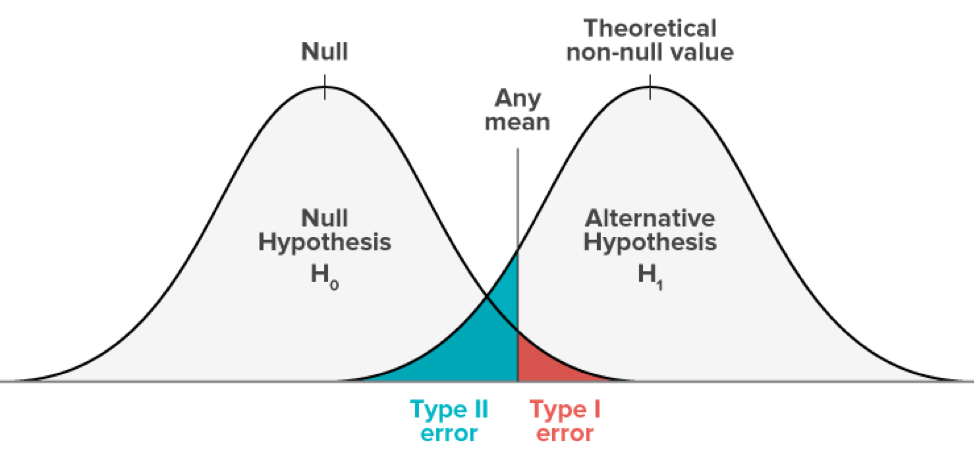

- Under both H0 and H1, there is a certain distribution of the **test statistic** $X$. For simplicity, let's assume normal distribution
    - $X \sim N(\mu_X, \sigma_X^2)$
- Let's say we want the probability of Type 1 error (red area) be $\alpha = 5\%$
- Set up this way, we will reject the null if and only if our sampled value $\bar{X}$ exceeds the value $x$ such that the cumulative area of the distribution above $x$ is 0.05. 
- In other words, reject null if $\frac{\bar{X} - \mu{X}}{\sigma_X} \ge Z_{0.95}$ from the standard normal distribution table

## Hypothesis testing tradeoffs

- Of course, you may be wondering, why not just set a very strict rejection criteria, so that we will almost never reject the null hypothesis until we see some value that is completely off the charts 
    - That is, we want $\alpha$ (probability type 1 error) to be very small

- The illustration above should quite clearly illustrate why we don't do this. If we want $\alpha$ to be small, then $\beta$ (probability type 2 error) will naturally be larger
    - $\beta$ is $Pr(\text{do not reject H0} | \text{H0 is false})$
    - Power of test power is $Pr(\text{reject H0} | \text{H0 is false})$
    - So $\beta + \text{power of test} = 1$

- So to run a hypothesis test, we can use the formulaic procedure:
    1. State H0 and H1
    2. Decide what your test statistic is (i.e. what will you be sampling, $\bar{X}$?)
    3. Decide your significance level
    4. Compute the observed statistic
    5. Compute the `p-value` using $\frac{\bar{x} - \mu}{\sigma_{?}}$
        - Note that $\sigma_{?}$ denotes the possibility of using either the sample or population stddev
        - If population stddev is known, $\sigma_{?} = \frac{\sigma_{population}}{\sqrt{n}}$
        - If unknown $\sigma_{?} = \frac{s_{sample}}{\sqrt{n}}$

## Two sample t-testing

- So far, we have explored using a t-test in hypothesis testing
    - That is, we have a sample --> which gives us some metric of interest --> which is compared against a given value (null hypothesis H0)

- But there is no reason why the second element of the comparison has to be a constant. We can feasibly take 2 samples and compare them to each other!

- Such a case is known as the two sample t-test

- A two sample t-test applies when
    - All observations in both groups are unique
    - Every observation is independent
    - Populations are normally distributed

- Let's illustrate with an example. 
    - We want to know if the average height in Singapore is different from the average height in USA
    - $H_{SG} = X \sim N(\mu_{SG}, \sigma_{SG})$
    - $H_{US} = Y \sim N(\mu_{US}, \sigma_{US})$
    - Taking a sample of 10 observations from both observations, obeying the assumptions above, we know that $\bar{X} = \frac{1}{10} \sum_{i=1}^{10} X_{i}$ and $\bar{Y} = \frac{1}{10} \sum_{i=1}^{10} Y_{i}$
    - If we know $\sigma_X$ and $\sigma_Y$:
        - $\bar{X} - \bar{Y} \sim N(\mu_X - \mu_Y,  \sqrt{\frac{\sigma_X^2}{10} + \frac{\sigma_Y^2}{10}})$
        - $\frac{(\bar{X} - \bar{Y}) - (\mu_X - \mu_Y)}{\sqrt{\frac{\sigma_X^2}{10} + \frac{\sigma_Y^2}{10}}} \sim N(0, 1)$
    - Typically, we don't know $\sigma_X$ and $\sigma_Y$, so we replace with sample stddev $s_x$ and $s_y$
        - $\frac{(\bar{X} - \bar{Y}) - (\mu_X - \mu_Y)}{\sqrt{\frac{s_{\bar{X}}^2}{10} + \frac{s_{\bar{Y}}^2}{10}}} \sim t(df)$
        - In this case, the degrees of freedom $df$ is more complicated than in the earlier cases
            - $df = \frac{(\frac{s_x^2}{n_x} + \frac{s_y^2}{n_y})^2}{\frac{(\frac{s_x^2}{n_x})^2}{n_x - 1} + \frac{(\frac{s_y^2}{n_y})^2}{n_y - 1}}$


## Paired t-test

- So far, all the t tests we have dealt with involved independent samples. What happens when the samples are not independent?

- Suppose we have a situation where we have a sample population undergoing a weight loss treatment
    - Pre-treatment, we measure weight $w_{pre}$ of every person
    - Post-treatment, we do this again to get $w_{post}$
    - Since we are comparing the changes in weight for the **same person**, the observations are considered "paired"

- The metric of interest is $\frac{\sum_{i=1}^{N} w_{i}^{pre} - w_{i}^{post}}{N}$
    - Let $w_{pre} - w_{post}$ be $D$
    - If $w_{pre}$ and $w_{post}$ are gaussian, then $D$ is also Gaussian
    - That is; $\frac{D - \mu_D}{\frac{\sigma_D}{\sqrt{N}}} \sim N(0, 1)$

- As usual, we won't know $\sigma_D$. So let's replace $\sigma_D$ with $s_D$, the sample standard deviation
    - So $\frac{D - \mu_D}{\frac{s_D}{\sqrt{N}}} \sim t(N-1)$

## A/B Testing

- It is literally just a t-test, but usually it's a 2 sample t-test for proportions
- See notebook two_sample_test_for_proportions.ipynb